In [5]:
import numpy as np
import numexpr as npexp
import matplotlib.pyplot as plt
import matplotlib.image as im

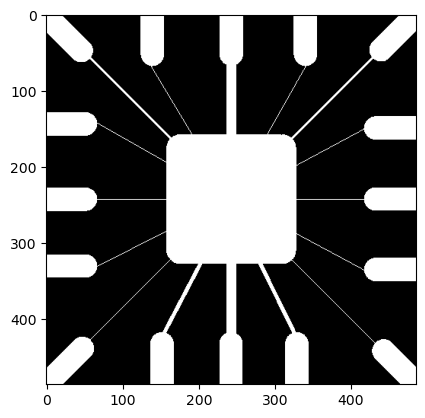

In [6]:
pcb_image = im.imread('Fig0905(a)(wirebond-mask).tif')
pcb_image = pcb_image[:,:,0]
pcb_image_ori = pcb_image
plt.imshow(pcb_image,cmap='gray')
plt.show()

#### Erosion using square mask

Creating Structuring Element of given size

In [7]:
m = n = 10
struct_ele = np.ones((m,n))
struct_ele

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [8]:
pcb_image.shape

(486, 486)

Padding image to ustilise created structural element

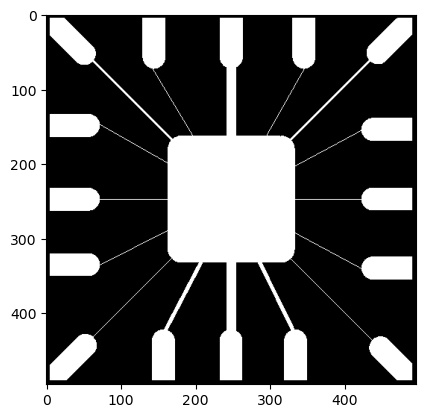

In [9]:
pcb_image = np.pad(pcb_image,pad_width=((m//2),(n//2)))
pcb_image.shape
plt.imshow(pcb_image,cmap='gray')
plt.show()

In [10]:
def parts(image,struct_ele,i,j):
    m,n = struct_ele.shape
    return image[i:m+i,j:j+n]

In [11]:
# parts(pcb_image,struct_ele,17,17)

In [12]:
m,n = struct_ele.shape
for i in range(m//2,pcb_image.shape[0]-m+1):
    for j in range(n//2,pcb_image.shape[1]-n+1):
        pcb_image[i][j] = np.min(np.multiply(parts(pcb_image,struct_ele,i,j),(struct_ele)))
#          sliced = parts(pcb_image,struct_ele,i,j)
#          if sliced.shape == struct_ele.shape:
#             continue
#          else:
#              print(i,j)

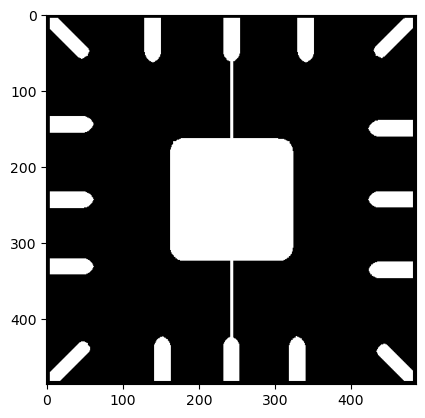

In [13]:
pcb_image = pcb_image[:-m,:-n]
plt.imshow(pcb_image,cmap='gray')
plt.show()

In [14]:
pcb_image.shape

(486, 486)

Final result 

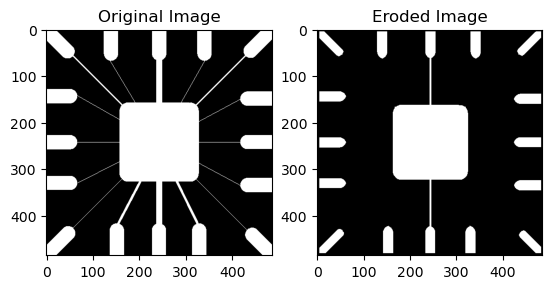

In [15]:
fig, ax = plt.subplots(nrows=1,ncols=2)
ax[0].imshow(pcb_image_ori,cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(pcb_image,cmap='gray')
ax[1].set_title('Eroded Image')
plt.show()

We can conclude that as we increase the number of time we use the structural element on the image the image gets further eroded ans looses more features. Also if we increase the size of the strtural element there 

#### Erosion using Circular mask

In [16]:
m = n = 11
struct_ele_cir = np.ones((m,n))

In [17]:
pcb_image = pcb_image_ori

In [18]:
def create_circular_mask(h, w, center=None, radius=None):

    if center is None:
        center = (int(w/2), int(h/2))
    if radius is None: 
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= radius
    return mask

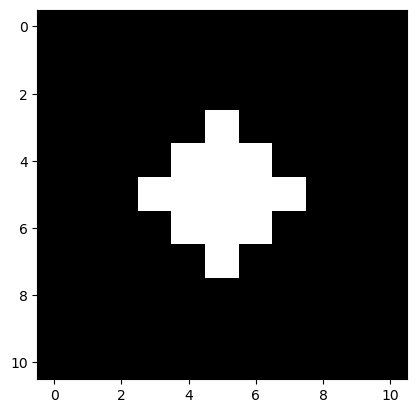

In [19]:
struct_ele_cir = create_circular_mask(h=11,w=11,radius=2)
plt.imshow(struct_ele_cir,cmap='gray')
plt.show()

In [20]:
struct_ele_cir.shape

(11, 11)

In [21]:
m,n = struct_ele_cir.shape
for i in range(m//2,pcb_image.shape[0]-m+1):
    for j in range(n//2,pcb_image.shape[1]-n+1):
        pcb_image[i][j] = np.min(np.multiply(parts(pcb_image,struct_ele_cir,i,j),(struct_ele_cir)))
#          sliced = parts(pcb_image,struct_ele,i,j)
#          if sliced.shape == struct_ele.shape:
#             continue
#          else:
#              print(i,j)

In [22]:
# pcb_image = pcb_image[:-m,:-n]
# plt.imshow(pcb_image,cmap='gray')
# plt.show()

In [23]:
# fig, ax = plt.subplots(nrows=1,ncols=2)
# ax[0].imshow(pcb_image_ori,cmap='gray',vmax=255,vmin=0)
# ax[0].set_title('Original Image')
# ax[1].imshow(pcb_image,cmap='gray',vmax=255,vmin=0)
# ax[1].set_title('Eroded Image (Circular SE)')
# plt.show()

#### Dilation on images

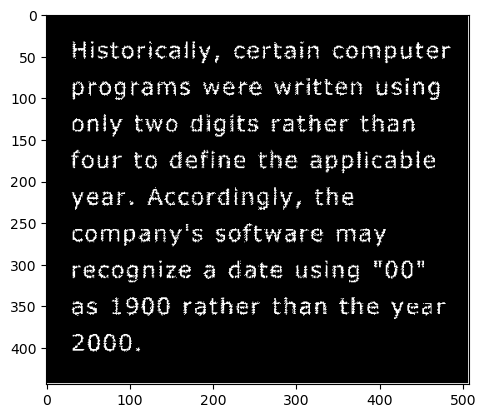

In [36]:
text = im.imread('Fig0907(a)(text_gaps_1_and_2_pixels).tif')
text = text[:,:,0]
text_original = text
plt.imshow(text,cmap='gray')
plt.show()

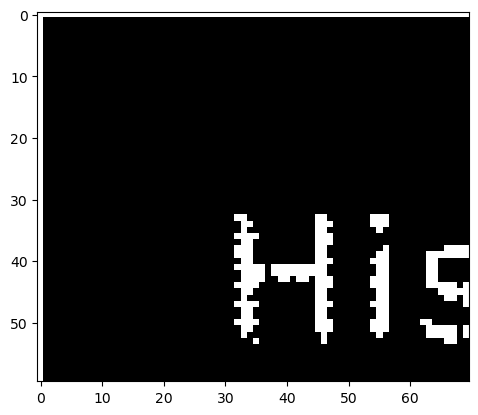

In [38]:
plt.imshow(text[:60,:70],cmap='gray')
plt.show()

In [26]:
m = n = 5
struct_ele = np.ones((m,n))
struct_ele = np.pad(struct_ele,pad_width=(m-2,n-2))
struct_ele

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [27]:
struct_ele.shape

(11, 11)

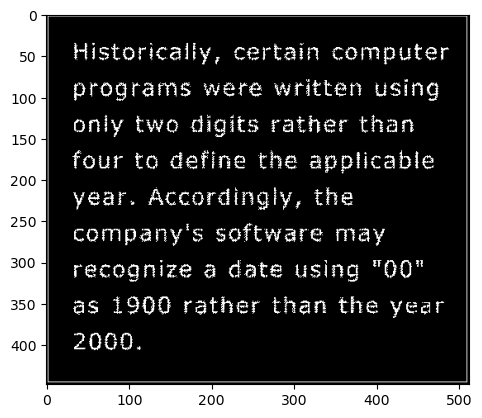

In [28]:
text = np.pad(text,pad_width=((m//2),(n//2)))
text.shape
plt.imshow(text,cmap='gray')
plt.show()

In [29]:
m,n = struct_ele.shape
for i in range(m//2,text.shape[0]-n):
    for j in range(n//2,text.shape[1]-m):
        text[i][j] = np.max(np.multiply(parts(text,struct_ele,i,j),(struct_ele)))

In [30]:
text = text[:-m,:-n]

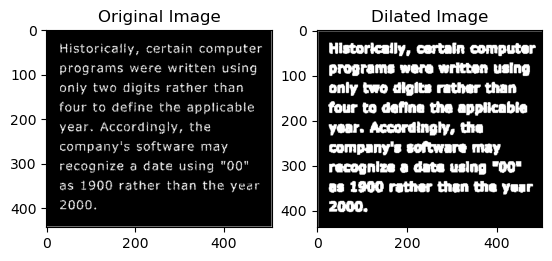

In [31]:
fig, ax = plt.subplots(nrows=1,ncols=2)
ax[0].imshow(text_original,cmap='gray',vmax=255,vmin=0)
ax[0].set_title('Original Image')
ax[1].imshow(text,cmap='gray',vmax=255,vmin=0)
ax[1].set_title('Dilated Image')
plt.show()

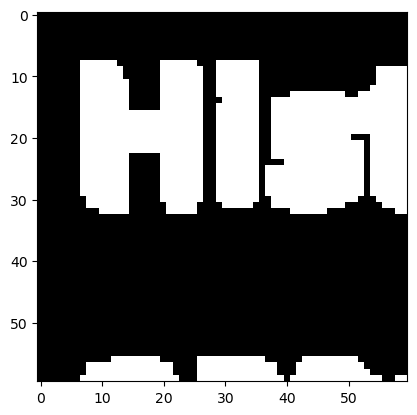

In [32]:
plt.imshow(text[20:80,20:80],cmap='gray')
plt.show()

In [33]:
# def dilate_this(image_file, dilation_level=3, with_plot=False):
#     # setting the dilation_level
#     dilation_level = 3 if dilation_level < 3 else dilation_level
    
#     # obtain the kernel by the shape of (dilation_level, dilation_level)
#     structuring_kernel = np.full(shape=(dilation_level, dilation_level), fill_value=255)
#     image_src = binarize_this(image_file=image_file)
    
#     orig_shape = image_src.shape
#     pad_width = dilation_level - 2
    
#     # pad the image with pad_width
#     image_pad = np.pad(array=image_src, pad_width=pad_width, mode='constant')
#     pimg_shape = image_pad.shape
#     h_reduce, w_reduce = (pimg_shape[0] - orig_shape[0]), (pimg_shape[1] - orig_shape[1])
    
#     # obtain the submatrices according to the size of the kernel
#     flat_submatrices = np.array([
#         image_pad[i:(i + dilation_level), j:(j + dilation_level)]
#         for i in range(pimg_shape[0] - h_reduce) for j in range(pimg_shape[1] - w_reduce)
#     ])
    
#     # replace the values either 255 or 0 by dilation condition
#     image_dilate = np.array([255 if (i == structuring_kernel).any() else 0 for i in flat_submatrices])
#     # obtain new matrix whose shape is equal to the original image size
#     image_dilate = image_dilate.reshape(orig_shape)
    
#     # plotting
#     if with_plot:
#         cmap_val = 'gray'
#         fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 20))
        
#         ax1.axis("off")
#         ax1.title.set_text('Original')
        
#         ax2.axis("off")
#         ax2.title.set_text("Dilated - {}".format(dilation_level))
        
#         ax1.imshow(image_src, cmap=cmap_val)
#         ax2.imshow(image_dilate, cmap=cmap_val)
#         plt.show()
#         return True
#     return image_dilate